<a href="https://colab.research.google.com/github/Gxwthmmmm/Medical-Image-Distortion/blob/main/Compare_the_CNN_and_Image_processing_processed_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traditional Image processing technique

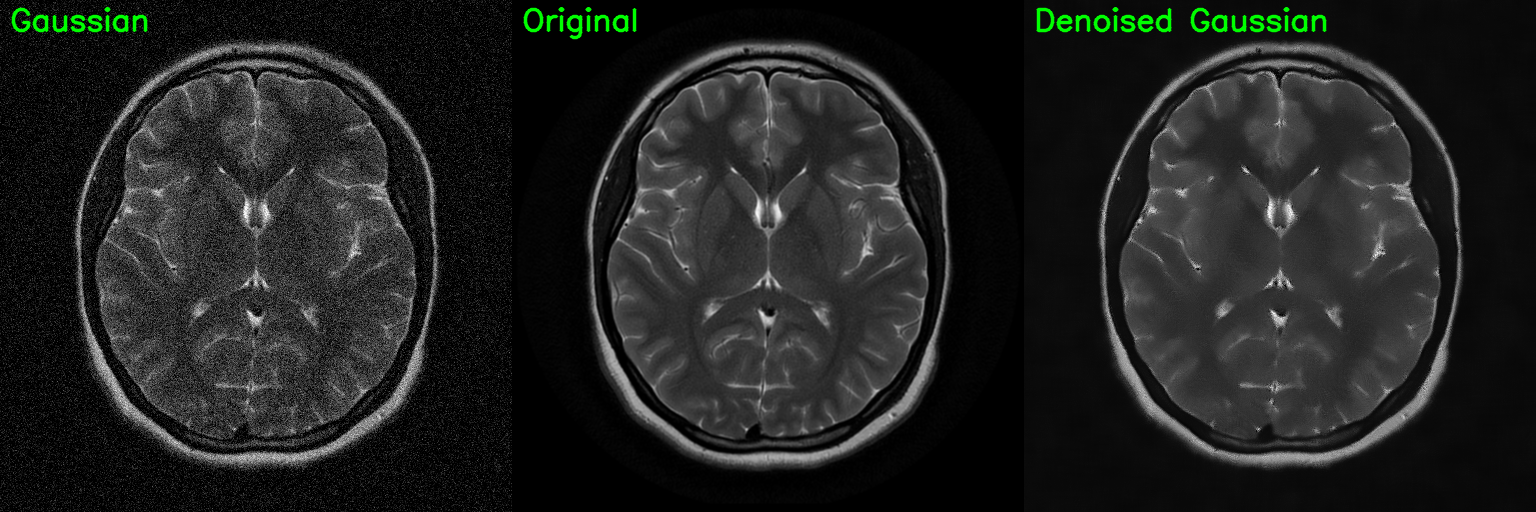

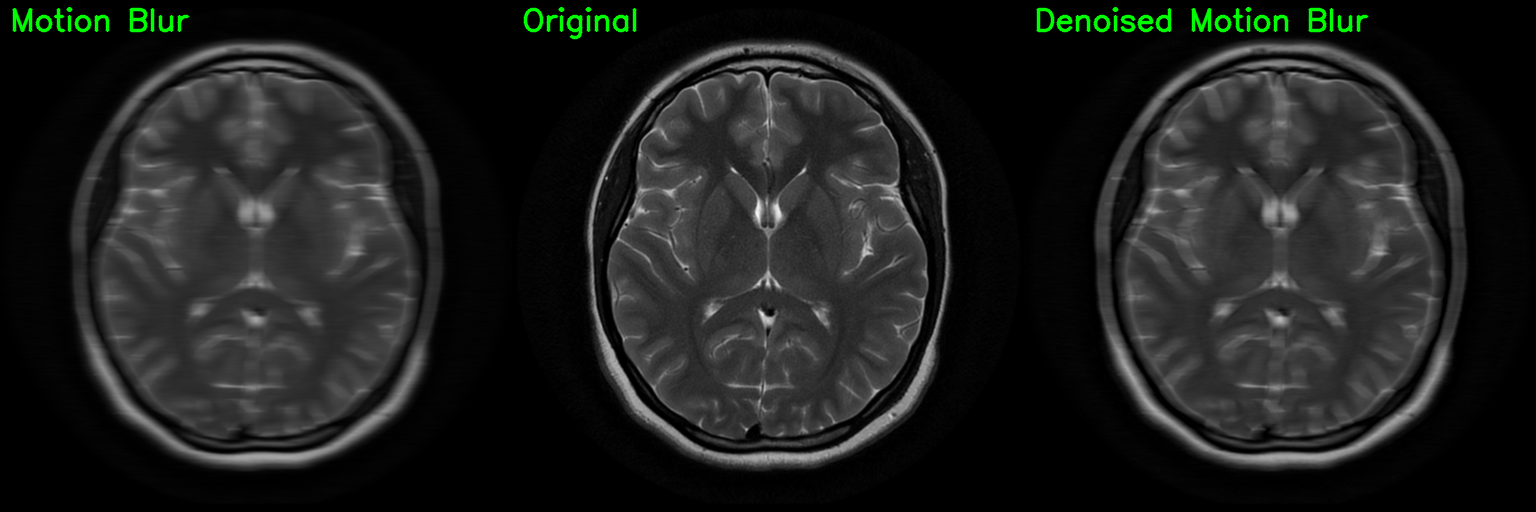

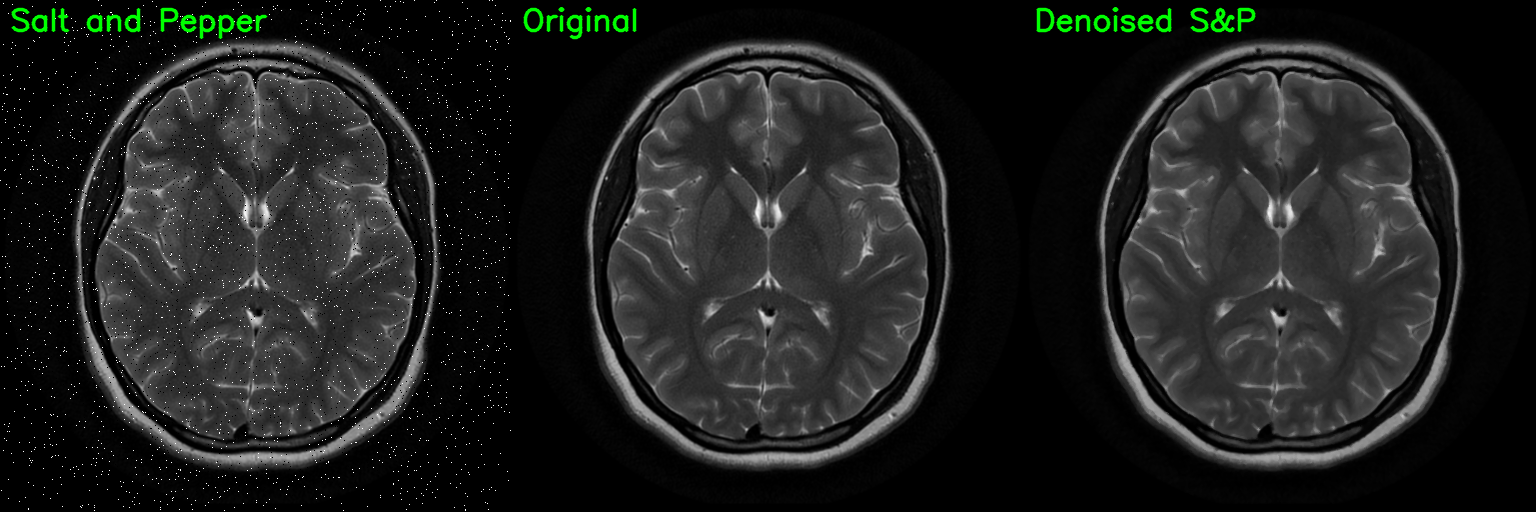

In [ ]:
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow  # Use this only in Colab

# --- Noise generation functions ---

def add_gaussian_noise(image, mean=0, std=25):
    gauss = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def add_motion_blur(image, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size-1)/2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size
    blurred = cv2.filter2D(image, -1, kernel)
    return blurred

def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = image.copy()
    total_pixels = image.size
    # Salt noise
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[tuple(coords)] = 255
    # Pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[tuple(coords)] = 0
    return noisy

# --- Denoising functions ---

def denoise_gaussian(noisy_img):
    return cv2.fastNlMeansDenoising(noisy_img, None, h=20, templateWindowSize=7, searchWindowSize=21)

def denoise_motion_blur(noisy_img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size
    sharpen_kernel = -kernel
    sharpen_kernel[int((kernel_size - 1) / 2), int((kernel_size - 1) / 2)] += 2
    deblurred = cv2.filter2D(noisy_img, -1, sharpen_kernel)
    return deblurred

def denoise_salt_and_pepper(noisy_img):
    return cv2.medianBlur(noisy_img, 3)

# --- Utility to display images side-by-side ---

def stack_images(images, titles=None):
    imgs_color = [cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) if len(img.shape) == 2 else img for img in images]
    max_height = max(img.shape[0] for img in imgs_color)
    resized_imgs = []
    for img in imgs_color:
        scale_factor = max_height / img.shape[0]
        new_width = int(img.shape[1] * scale_factor)
        resized_imgs.append(cv2.resize(img, (new_width, max_height)))
    combined = cv2.hconcat(resized_imgs)
    if titles:
        for i, title in enumerate(titles):
            x_offset = sum(img.shape[1] for img in resized_imgs[:i])
            cv2.putText(combined, title, (x_offset + 10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
    return combined

# --- Main script ---

if __name__ == "__main__":
    base_image_path = "brain.png"  # Upload your base image to Colab or provide local path
    base_img = cv2.imread(base_image_path, cv2.IMREAD_GRAYSCALE)
    if base_img is None:
        print(f"Error: Base image '{base_image_path}'")
        exit()

    # Generate distorted images
    distorted_gaussian = add_gaussian_noise(base_img)
    distorted_motion = add_motion_blur(base_img)
    distorted_sp = add_salt_and_pepper_noise(base_img)

    # Denoise distorted images
    denoised_gaussian = denoise_gaussian(distorted_gaussian)
    denoised_motion = denoise_motion_blur(distorted_motion)
    denoised_sp = denoise_salt_and_pepper(distorted_sp)

    # Display original, distorted, and denoised images side-by-side
    titles_gauss = ["Gaussian ", "Original", "Denoised Gaussian"]
    imgs_gauss = [ distorted_gaussian, base_img,denoised_gaussian]
    combined_gauss = stack_images(imgs_gauss, titles_gauss)

    titles_motion = ["Motion Blur", "Original", "Denoised Motion Blur"]
    imgs_motion = [distorted_motion,base_img, denoised_motion]
    combined_motion = stack_images(imgs_motion, titles_motion)

    titles_sp = ["Salt and Pepper", "Original", "Denoised S&P"]
    imgs_sp = [distorted_sp, base_img, denoised_sp]
    combined_sp = stack_images(imgs_sp, titles_sp)

    # Display images (use cv2_imshow if in Colab)
    cv2_imshow(combined_gauss)
    cv2_imshow(combined_motion)
    cv2_imshow(combined_sp)


CNN Image processing technique

Dataset generated with Gaussian noise levels.
Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.

Training classifier on noisy images...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 521ms/step - accuracy: 0.2759 - loss: 1.6206 - val_accuracy: 0.8000 - val_loss: 1.1815
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 483ms/step - accuracy: 0.5618 - loss: 1.0525 - val_accuracy: 0.6000 - val_loss: 0.6914
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 457ms/step - accuracy: 0.8410 - loss: 0.4420 - val_accuracy: 1.0000 - val_loss: 0.0670
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 512ms/step - accuracy: 1.0000 - loss: 0.0334 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 516ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 512ms/step - accuracy: 1.0000 - loss: 8.6992e-04 - val_accuracy: 1.0000 - val_loss: 6.9723e-04
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 1.0000 - loss: 5.3903e-04 - val_accuracy: 1.0000 - val_loss: 5.3595e-04
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 544ms/step - accuracy: 1.0000 - loss: 3.7

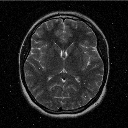

Denoised Image:


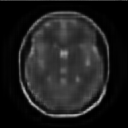

In [ ]:
import numpy as np
import cv2
import os
import shutil
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Input, Model
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load base image
base_image_path = "/content/brain_mri_4.png.png"
if not os.path.exists(base_image_path):
    print(f"Image '{base_image_path}' not found.")
    img_np = None
else:
    img = Image.open(base_image_path).convert("L")
    img_np = np.array(img)

if img_np is not None:
    # Settings
    noise_levels = [10, 20, 30, 40, 50]  # std_dev for Gaussian noise
    num_per_level = 80  # images per noise level
    img_size = (128, 128)

    # Clean previous dataset
    dataset_dir = "dataset_gaussian"
    if os.path.exists(dataset_dir):
        shutil.rmtree(dataset_dir)

    # Generate noisy images dataset
    for i, std_dev in enumerate(noise_levels):
        level_dir = os.path.join(dataset_dir, f"Noise_Level_{i+1}")
        os.makedirs(level_dir, exist_ok=True)

        for j in range(num_per_level):
            noisy_img = img_np + np.random.normal(0, std_dev, img_np.shape)
            noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
            resized = cv2.resize(noisy_img, img_size)
            cv2.imwrite(os.path.join(level_dir, f"noisy_{j+1:03}.png"), resized)

    print("Dataset generated with Gaussian noise levels.")

    # Data generators for classification
    batch_size = 16
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        dataset_dir,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        dataset_dir,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical',
        subset='validation'
    )

    # Define CNN classifier model
    classifier = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(train_data.num_classes, activation='softmax')
    ])

    classifier.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

    print("\nTraining classifier on noisy images...")
    classifier.fit(train_data, epochs=10, validation_data=val_data)

    # Evaluate classifier
    loss, acc = classifier.evaluate(val_data)
    print(f"\nClassifier Validation Accuracy: {acc:.4f}")

    # --- Define simple convolutional autoencoder for denoising ---

    input_img = Input(shape=(128, 128, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Prepare dataset for autoencoder (noisy images as input, clean image as output)
    X_train_noisy = []
    X_train_clean = []

    clean_img_resized = cv2.resize(img_np, img_size).astype('float32') / 255.

    for i in range(len(noise_levels)):
        level_dir = os.path.join(dataset_dir, f"Noise_Level_{i+1}")
        for j in range(num_per_level):
            noisy_path = os.path.join(level_dir, f"noisy_{j+1:03}.png")
            noisy_img = cv2.imread(noisy_path, cv2.IMREAD_GRAYSCALE)
            noisy_img = cv2.resize(noisy_img, img_size).astype('float32') / 255.
            X_train_noisy.append(noisy_img)
            X_train_clean.append(clean_img_resized)

    X_train_noisy = np.array(X_train_noisy)[..., np.newaxis]
    X_train_clean = np.array(X_train_clean)[..., np.newaxis]

    print("\nTraining autoencoder for denoising...")
    autoencoder.fit(X_train_noisy, X_train_clean,
                    epochs=20,
                    batch_size=16,
                    validation_split=0.2)

    # Example: Predict noise level and denoise a noisy test image
    test_noisy_img = X_train_noisy[0]  # take first noisy image as example
    test_noisy_img_exp = np.expand_dims(test_noisy_img, axis=0)  # batch dimension

    # Predict noise level class
    pred_class = classifier.predict(test_noisy_img_exp)
    predicted_noise_level = np.argmax(pred_class)
    print(f"Predicted noise level class: {predicted_noise_level + 1} (std_dev={noise_levels[predicted_noise_level]})")

    # Denoise image
    denoised_img = autoencoder.predict(test_noisy_img_exp)[0, ..., 0]

    # Convert denoised image back to uint8 for visualization
    denoised_img_uint8 = (denoised_img * 255).astype(np.uint8)
    noisy_img_uint8 = (test_noisy_img[..., 0] * 255).astype(np.uint8)

    # Display images inline in Colab
    print("Noisy Image:")
    cv2_imshow(noisy_img_uint8)
    print("Denoised Image:")
    cv2_imshow(denoised_img_uint8)

else:
    print("Base image could not be loaded. Exiting.")


In [ ]:
import numpy as np
import cv2
import os
import shutil
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, Dropout, concatenate, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load base image
base_image_path = "/content/brain_mri_1.png.png"
if not os.path.exists(base_image_path):
    print(f"Image '{base_image_path}' not found.")
    img_np = None
else:
    img = Image.open(base_image_path).convert("L")
    img_np = np.array(img)

if img_np is not None:
    # Settings
    noise_levels = [10, 20, 30, 40, 50]  # std_dev for Gaussian noise
    num_per_level = 80  # images per noise level
    img_size = (128, 128)

    # Clean previous dataset
    dataset_dir = "dataset_gaussian"
    if os.path.exists(dataset_dir):
        shutil.rmtree(dataset_dir)

    # Generate noisy images dataset
    for i, std_dev in enumerate(noise_levels):
        level_dir = os.path.join(dataset_dir, f"Noise_Level_{i+1}")
        os.makedirs(level_dir, exist_ok=True)

        for j in range(num_per_level):
            noisy_img = img_np + np.random.normal(0, std_dev, img_np.shape)
            noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
            resized = cv2.resize(noisy_img, img_size)
            cv2.imwrite(os.path.join(level_dir, f"noisy_{j+1:03}.png"), resized)

    print("Dataset generated with Gaussian noise levels.")

    # Data generators for classification
    batch_size = 16
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        dataset_dir,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        dataset_dir,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical',
        subset='validation'
    )

    # Define CNN classifier model
    classifier = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(train_data.num_classes, activation='softmax')
    ])

    classifier.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

    print("\nTraining classifier on noisy images...")
    classifier.fit(train_data, epochs=15, validation_data=val_data)

    # Evaluate classifier
    loss, acc = classifier.evaluate(val_data)
    print(f"\nClassifier Validation Accuracy: {acc:.4f}")

    # --- Improved convolutional autoencoder (U-Net style) for denoising ---

    input_img = Input(shape=(128, 128, 1))

    # Encoder
    c1 = Conv2D(64, (3, 3), padding='same')(input_img)
    c1 = BatchNormalization()(c1)
    c1 = LeakyReLU()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = LeakyReLU()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = LeakyReLU()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    b = Conv2D(512, (3, 3), padding='same')(p3)
    b = BatchNormalization()(b)
    b = LeakyReLU()(b)

    # Decoder with skip connections
    u3 = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(b)
    u3 = concatenate([u3, c3])
    u3 = BatchNormalization()(u3)
    u3 = LeakyReLU()(u3)

    u2 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(u3)
    u2 = concatenate([u2, c2])
    u2 = BatchNormalization()(u2)
    u2 = LeakyReLU()(u2)

    u1 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(u2)
    u1 = concatenate([u1, c1])
    u1 = BatchNormalization()(u1)
    u1 = LeakyReLU()(u1)

    output_img = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(u1)

    autoencoder = Model(input_img, output_img)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Prepare dataset for autoencoder (noisy images as input, clean image as output)
    X_train_noisy = []
    X_train_clean = []

    clean_img_resized = cv2.resize(img_np, img_size).astype('float32') / 255.

    for i in range(len(noise_levels)):
        level_dir = os.path.join(dataset_dir, f"Noise_Level_{i+1}")
        for j in range(num_per_level):
            noisy_path = os.path.join(level_dir, f"noisy_{j+1:03}.png")
            noisy_img = cv2.imread(noisy_path, cv2.IMREAD_GRAYSCALE)
            noisy_img = cv2.resize(noisy_img, img_size).astype('float32') / 255.
            X_train_noisy.append(noisy_img)
            X_train_clean.append(clean_img_resized)

    X_train_noisy = np.array(X_train_noisy)[..., np.newaxis]
    X_train_clean = np.array(X_train_clean)[..., np.newaxis]

    print("\nTraining improved autoencoder for denoising...")
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    autoencoder.fit(
        X_train_noisy, X_train_clean,
        epochs=50,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stop]
    )

    # Example: Predict noise level and denoise a noisy test image
    test_noisy_img = X_train_noisy[0]  # take first noisy image as example
    test_noisy_img_exp = np.expand_dims(test_noisy_img, axis=0)  # batch dimension

    # Predict noise level class
    pred_class = classifier.predict(test_noisy_img_exp)
    predicted_noise_level = np.argmax(pred_class)
    print(f"Predicted noise level class: {predicted_noise_level + 1} (std_dev={noise_levels[predicted_noise_level]})")

    # Denoise image
    denoised_img = autoencoder.predict(test_noisy_img_exp)[0, ..., 0]

    # Convert denoised image back to uint8 for visualization
    denoised_img_uint8 = (denoised_img * 255).astype(np.uint8)
    noisy_img_uint8 = (test_noisy_img[..., 0] * 255).astype(np.uint8)

    # Display images inline in Colab
    print("Noisy Image:")
    cv2_imshow(noisy_img_uint8)
    print("Denoised Image:")
    cv2_imshow(denoised_img_uint8)

else:
    print("Base image could not be loaded. Exiting.")


Dataset generated with Gaussian noise levels.
Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training classifier on noisy images...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1665 - loss: 2.6515 - val_accuracy: 0.2000 - val_loss: 1.6087
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1853 - loss: 1.6102 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.2246 - loss: 1.6108 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2190 - loss: 1.6093 - val_accuracy: 0.1875 - val_loss: 1.6095
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.2023 - loss: 1.6100 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.1970 - loss: 1.6096 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2170 - loss: 1.6090 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.2063 - loss: 1.6094 - val_accuracy: 0.2000 - val_loss: 1.6095
Epo

jhds

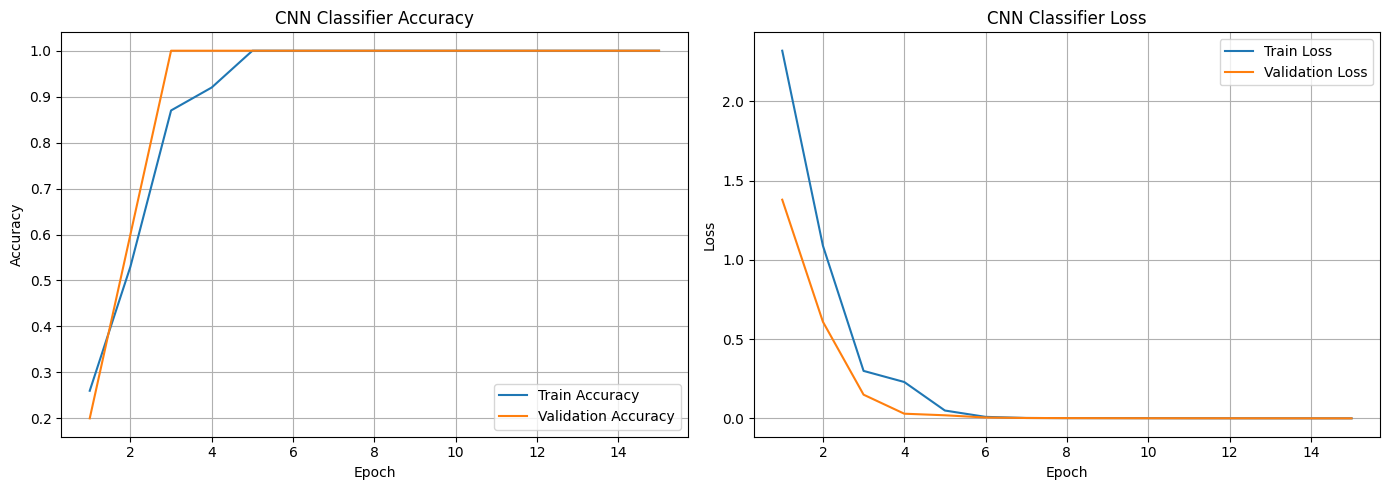

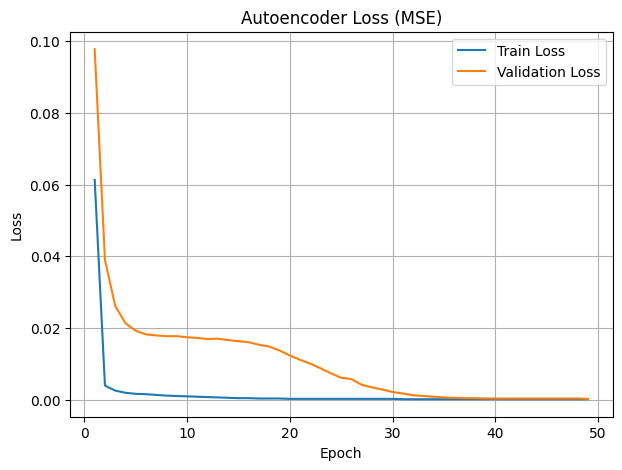

In [ ]:
import matplotlib.pyplot as plt

# Data for classifier training
epochs_classifier = list(range(1, 16))
train_acc = [0.26, 0.53, 0.87, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
val_acc = [0.20, 0.60, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
train_loss = [2.32, 1.09, 0.30, 0.23, 0.05, 0.01, 0.003, 0.002, 0.0019, 0.0016, 0.0012, 0.0010, 0.0009, 0.0008, 0.0008]
val_loss = [1.38, 0.61, 0.15, 0.03, 0.02, 0.006, 0.0029, 0.0022, 0.0017, 0.0014, 0.0012, 0.0011, 0.0009, 0.0008, 0.0007]

# Data for autoencoder training
epochs_autoencoder = list(range(1, 50)) # Changed from 51 to 50
train_loss_ae = [0.0613, 0.0039, 0.0025, 0.0019, 0.0016, 0.0015, 0.0013, 0.0011, 0.0010, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
val_loss_ae = [0.0978, 0.0390, 0.0261, 0.0213, 0.0192, 0.0182, 0.0179, 0.0177, 0.0177, 0.0174, 0.0172, 0.0169, 0.0170, 0.0166, 0.0163, 0.0160, 0.0153, 0.0148, 0.0137, 0.0123, 0.0111, 0.0100, 0.0087, 0.0073, 0.0061, 0.0057, 0.0041, 0.0034, 0.0028, 0.0021, 0.0017, 0.0012, 0.0010, 0.0008, 0.0006, 0.0005, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002]


# Plot classifier accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_classifier, train_acc, label='Train Accuracy')
plt.plot(epochs_classifier, val_acc, label='Validation Accuracy')
plt.title('CNN Classifier Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_classifier, train_loss, label='Train Loss')
plt.plot(epochs_classifier, val_loss, label='Validation Loss')
plt.title('CNN Classifier Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot autoencoder loss
plt.figure(figsize=(7, 5))
plt.plot(epochs_autoencoder, train_loss_ae, label='Train Loss')
plt.plot(epochs_autoencoder, val_loss_ae, label='Validation Loss')
plt.title('Autoencoder Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()